In [41]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Datasets/CustomerChurn.csv.xls")

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.drop('customerID',axis='columns',inplace=True)

In [6]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(dataset.TotalCharges,errors="coerce" ) #as TotalCharges is an object type

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:

dataset[pd.to_numeric(dataset.TotalCharges,errors="coerce" ).isnull()]



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#drop those rows
df = dataset[dataset.TotalCharges!=" "]

In [11]:
dataset.shape

(7043, 20)

In [12]:
df.shape #11 rows dropped

(7032, 20)

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_889/680514069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0.5, 1.0, 'Tenure/Churn Relation')

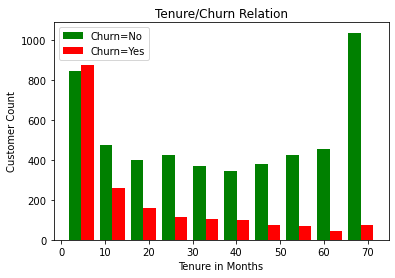

In [16]:
#visualization
tenure_no=df[df.Churn=='No'].tenure
tenure_yes = df[df.Churn=='Yes'].tenure


#plotting
plt.hist([tenure_no,tenure_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('Tenure in Months')
plt.ylabel('Customer Count')
plt.title('Tenure/Churn Relation')

Text(0.5, 1.0, 'Monthly Charges/Churn Relation')

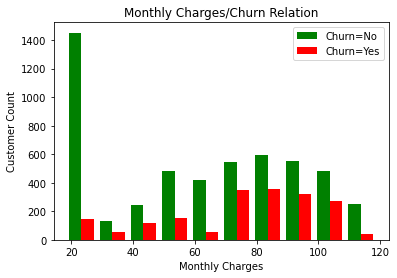

In [17]:
#visualization
monthly_no=df[df.Churn=='No'].MonthlyCharges
monthly_yes = df[df.Churn=='Yes'].MonthlyCharges


#plotting
plt.hist([monthly_no,monthly_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Customer Count')
plt.title('Monthly Charges/Churn Relation')

In [18]:
#unique features
def unique_feature():
    for column in df:
        if df[column].dtype == 'object':
            print(f"{column}: {df[column].unique()}")

In [19]:
df.replace("No phone service",'No',inplace=True)
df.replace("No internet service",'No',inplace=True)



/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_889/2646061905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("No phone service",'No',inplace=True)
/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_889/2646061905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("No internet service",'No',inplace=True)


In [20]:
unique_feature()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
#feTURES WITH YES/NO VALUES
yes_no_features = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [22]:
for column in yes_no_features:
    
    df[column].replace({'Yes':1,'No':0},inplace=True)
 
        

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_889/1508526944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].replace({'Yes':1,'No':0},inplace=True)


In [23]:
unique_feature()

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
df.replace({'Female':0,'Male':1},inplace=True)

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_889/4220174198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Female':0,'Male':1},inplace=True)


In [26]:
unique_feature()

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [28]:
df1= pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [30]:
df1.dtypes


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [31]:
features_scalable= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1[features_scalable]= sc.fit_transform(df1[features_scalable])

In [32]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [33]:
y= df1['Churn']
X = df1.drop('Churn',axis='columns')

In [34]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0.115423,0.001275,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0.385075,0.215867,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0.354229,0.010310,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,0.239303,0.210241,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,1,0.521891,0.015330,1,0,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train.shape

(5625, 23)

In [39]:
X_test.shape

(1407, 23)

In [40]:
y_train.shape

(5625,)

In [83]:
#model creation

model = keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 23)                552       
_________________________________________________________________
dense_36 (Dense)             (None, 100)               2400      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 23,253
Trainable params: 23,253
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [86]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
176/176 [==============================] - 0s 454us/step - loss: 0.5088 - accuracy: 0.7620
Epoch 2/100
176/176 [==============================] - 0s 428us/step - loss: 0.4307 - accuracy: 0.8002
Epoch 3/100
176/176 [==============================] - 0s 441us/step - loss: 0.4324 - accuracy: 0.7960
Epoch 4/100
176/176 [==============================] - 0s

176/176 [==============================] - 0s 439us/step - loss: 0.1288 - accuracy: 0.9444
Epoch 72/100
176/176 [==============================] - 0s 433us/step - loss: 0.1293 - accuracy: 0.9442
Epoch 73/100
176/176 [==============================] - 0s 427us/step - loss: 0.1402 - accuracy: 0.9374
Epoch 74/100
176/176 [==============================] - 0s 429us/step - loss: 0.1556 - accuracy: 0.9285
Epoch 75/100
176/176 [==============================] - 0s 426us/step - loss: 0.1304 - accuracy: 0.9420
Epoch 76/100
176/176 [==============================] - 0s 432us/step - loss: 0.1472 - accuracy: 0.9312
Epoch 77/100
176/176 [==============================] - 0s 429us/step - loss: 0.1332 - accuracy: 0.9371
Epoch 78/100
176/176 [==============================] - 0s 429us/step - loss: 0.1165 - accuracy: 0.9466
Epoch 79/100
176/176 [==============================] - 0s 435us/step - loss: 0.1329 - accuracy: 0.94240s - loss: 0.1296 - accuracy: 0.94
Epoch 80/100
176/176 [=====================

In [89]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 486us/step - loss: 1.4715 - accuracy: 0.7463


[1.4715262651443481, 0.746268630027771]

In [91]:
y_pred = model.predict(X_test)

In [93]:
y_pred1=[]
for i in y_pred:
    if i>0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1038
           1       0.52      0.51      0.51       369

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



Text(24.0, 0.5, 'Truth')

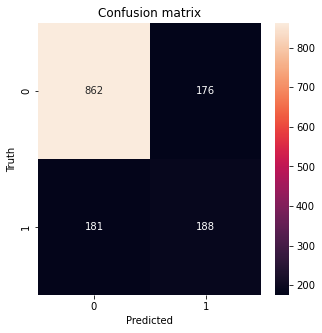

In [101]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize=(5,5))
plt.title('Confusion matrix')
sn.heatmap(cm,fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
